<a href="https://colab.research.google.com/github/parthkhanzode/Infosys-Milestone-2/blob/main/Milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving student_habits_performance.csv to student_habits_performance.csv
{'student_habits_performance.csv': b'student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score\r\nS1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2\r\nS1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0\r\nS1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3\r\nS1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8\r\nS1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4\r\nS1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0\r\nS1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8\r\nS1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6\r\nS1008,23,Female,4.4,2.2,1.7

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Study_Based_Recommendation/student_habits_performance.csv')
print("Data Loaded Successfully!")
print(df.shape)
df.head()


Data Loaded Successfully!
(1000, 16)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
features = ['study_hours_per_day', 'sleep_hours', 'social_media_hours',
            'exam_score', 'internet_quality', 'diet_quality',
            'extracurricular_participation', 'part_time_job']

In [ ]:
df_cluster = df[features]
df_cluster.head()

,study_hours_per_day,sleep_hours,social_media_hours,exam_score,internet_quality,diet_quality,extracurricular_participation,part_time_job
0,0.0,8.0,1.2,56.2,Average,Fair,Yes,No
1,6.9,4.6,2.8,100.0,Average,Good,No,No
2,1.4,8.0,3.1,34.3,Poor,Poor,No,No
3,1.0,9.2,3.9,26.8,Good,Poor,Yes,No
4,5.0,4.9,4.4,66.4,Good,Fair,No,No


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)
print("Data Scaled Successfully!")

ValueError: could not convert string to float: 'Average'

In [ ]:
# 🔹 Convert any categorical/text columns to numeric codes
for col in df_cluster.columns:
    if df_cluster[col].dtype == 'object':
        df_cluster[col] = df_cluster[col].astype('category').cat.codes

print("Converted all categorical columns to numeric!")
print(df_cluster.dtypes)


Converted all categorical columns to numeric!
study_hours_per_day              float64
sleep_hours                      float64
social_media_hours               float64
exam_score                       float64
internet_quality                    int8
diet_quality                        int8
extracurricular_participation       int8
part_time_job                       int8
dtype: object


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)
print("Data Scaled Successfully!")


Data Scaled Successfully!


In [ ]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

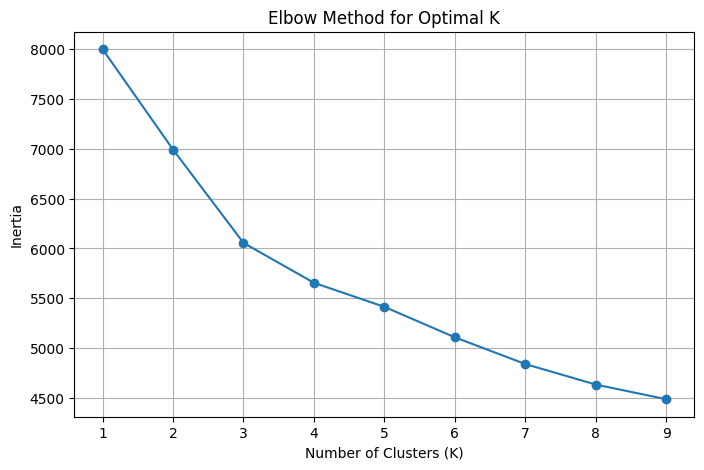

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
print("K-Means Clustering Done!")

K-Means Clustering Done!


In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

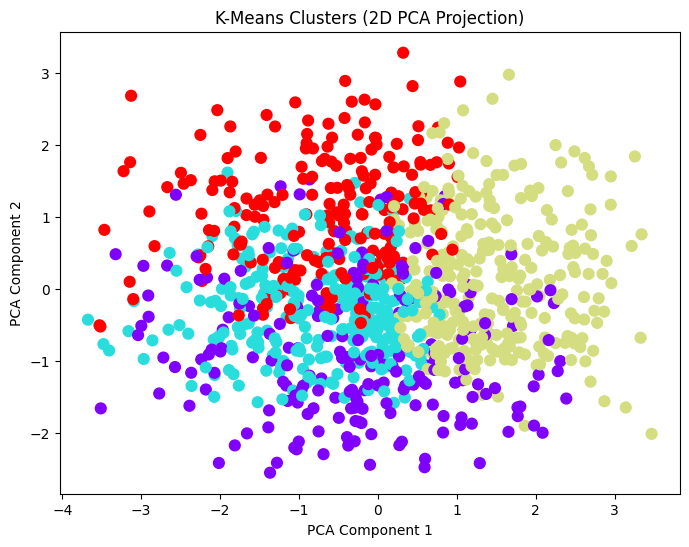

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['kmeans_cluster'], cmap='rainbow', s=60)
plt.title('K-Means Clusters (2D PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
for eps in [0.5, 0.6, 0.7, 0.8]:
    db = DBSCAN(eps=eps, min_samples=4)
    labels = db.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"eps={eps}: {n_clusters} clusters, noise={n_noise}")

eps=0.5: 2 clusters, noise=990
eps=0.6: 8 clusters, noise=964
eps=0.7: 22 clusters, noise=875
eps=0.8: 23 clusters, noise=778


In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=4)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)
print("DBSCAN Clustering Done!")


DBSCAN Clustering Done!


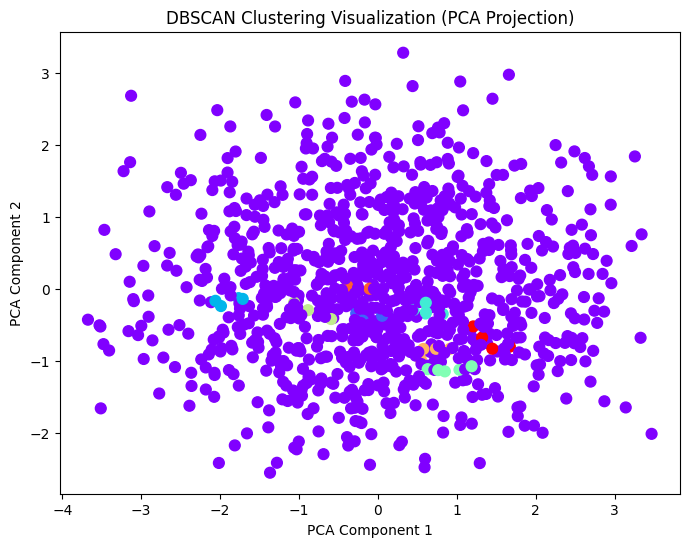

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['dbscan_cluster'], cmap='rainbow', s=60)
plt.title("DBSCAN Clustering Visualization (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [ ]:
print("K-Means Cluster Sizes:")
print(df['kmeans_cluster'].value_counts())


K-Means Cluster Sizes:
kmeans_cluster
2    294
1    280
3    218
0    208
Name: count, dtype: int64


In [ ]:
print("\nDBSCAN Cluster Sizes:")
print(df['dbscan_cluster'].value_counts())


DBSCAN Cluster Sizes:
dbscan_cluster
-1    964
 0      6
 2      5
 3      5
 6      4
 1      4
 5      4
 4      4
 7      4
Name: count, dtype: int64


In [ ]:
print("\nCluster Summary (K-Means):")
summary_kmeans = df.groupby('kmeans_cluster')[features].mean().round(2)
print(summary_kmeans)



Cluster Summary (K-Means):


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Convert any remaining non-numeric columns to numeric codes
for col in features:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes


In [ ]:
summary_kmeans = df.groupby('kmeans_cluster')[features].mean().round(2)
print(summary_kmeans)


                study_hours_per_day  sleep_hours  social_media_hours  \
kmeans_cluster                                                         
0                              3.36         6.44                2.56   
1                              2.81         5.98                2.75   
2                              4.94         6.66                2.22   
3                              2.81         6.88                2.52   

                exam_score  internet_quality  diet_quality  \
kmeans_cluster                                               
0                    67.70              0.68          0.75   
1                    59.13              1.00          0.34   
2                    86.40              0.68          0.55   
3                    62.21              0.68          1.53   

                extracurricular_participation  part_time_job  
kmeans_cluster                                                
0                                        0.30           1.00  
1    

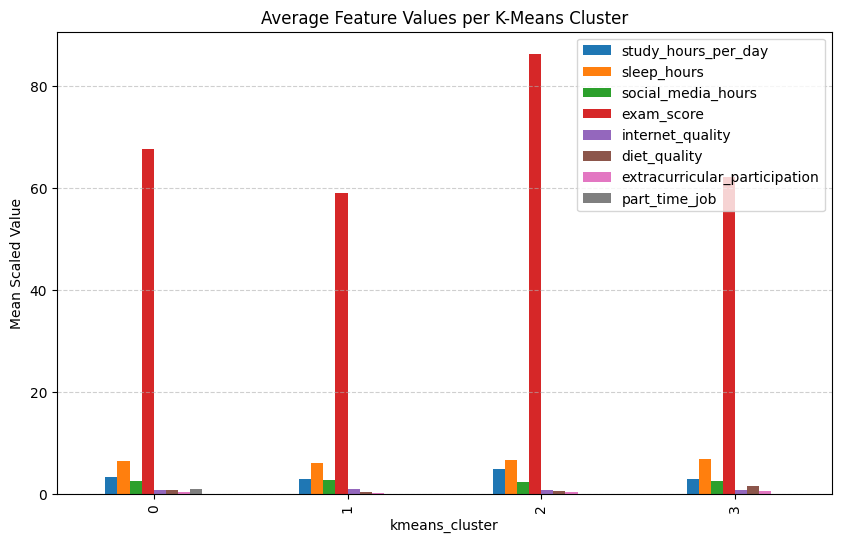

In [ ]:
summary_kmeans.plot(kind='bar', figsize=(10,6))
plt.title("Average Feature Values per K-Means Cluster")
plt.ylabel("Mean Scaled Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-2623533888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kmeans_cluster', y='exam_score', data=df, palette='coolwarm')


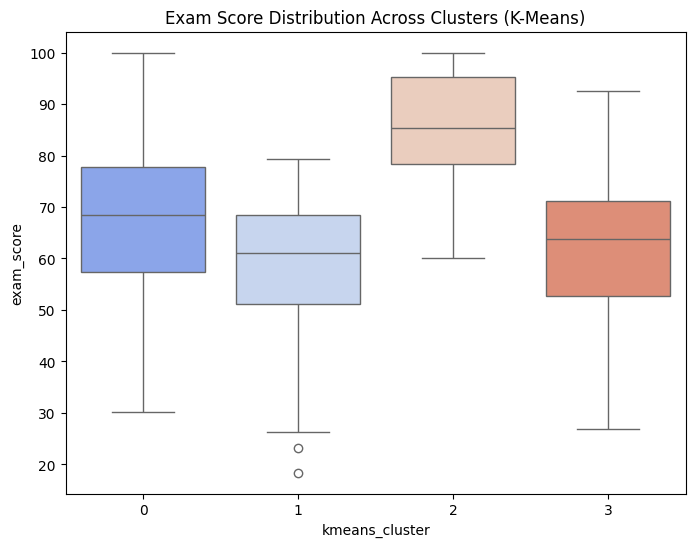

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='kmeans_cluster', y='exam_score', data=df, palette='coolwarm')
plt.title("Exam Score Distribution Across Clusters (K-Means)")
plt.show()

In [ ]:
cluster_labels = {
    0: 'Focused Learners',
    1: 'Balanced Lifestyle',
    2: 'Irregular / Distracted',
    3: 'High Achievers'
}


In [ ]:
df['cluster_label'] = df['kmeans_cluster'].map(cluster_labels)

In [ ]:
print("\nSample with Cluster Labels:")
print(df[['student_id', 'study_hours_per_day', 'exam_score', 'cluster_label']].head(10))


Sample with Cluster Labels:
  student_id  study_hours_per_day  exam_score           cluster_label
0      S1000                  0.0        56.2          High Achievers
1      S1001                  6.9       100.0  Irregular / Distracted
2      S1002                  1.4        34.3          High Achievers
3      S1003                  1.0        26.8          High Achievers
4      S1004                  5.0        66.4      Balanced Lifestyle
5      S1005                  7.2       100.0  Irregular / Distracted
6      S1006                  5.6        89.8        Focused Learners
7      S1007                  4.3        72.6        Focused Learners
8      S1008                  4.4        78.9  Irregular / Distracted
9      S1009                  4.8       100.0  Irregular / Distracted


In [ ]:
df.to_csv('/content/drive/MyDrive/Study_Based_Recommendation/student_clustered.csv', index=False)
print("Clustered Data Saved Successfully!")

OSError: [Errno 30] Read-only file system: '/content/drive/MyDrive/Study_Based_Recommendation/student_clustered.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/Study_Based_Recommendation/student_clustered.csv', index=False)
print("Clustered Data Saved Successfully!")

OSError: [Errno 30] Read-only file system: '/content/drive/MyDrive/Study_Based_Recommendation/student_clustered.csv'